**Project: Cyber Security Attack Type Detection**

**Preliminary EDA**

This notebook contains an initial exploratory data analysis (EDA) of the raw cybersecurity attack dataset (25 metrics, ~40,000 rows). 
The data has not yet been cleaned, so this analysis provides a high-level overview of attack patterns (e.g., attack types versus ports 
and severity) and highlights early feature and modeling considerations, while also highlighting data quality signals that may require 
attention from the DE team. Analysis will be refined once the cleaned dataset is provided by the DE team.

**1 -9 Phase 1: Data Integrity & Basic Profiling**
**10-12 Phase 2: Network & Payload Behavior (The "What" and "How")**
**13-14 Phase 3: Temporal & Rhythm Analysis (The "When")**
**15-16 Phase 4: Identity & Geography (The "Who" and "Where")**


In [1]:
# 0. Import essential libraries
import pandas as pd      
import numpy as np      
import matplotlib.pyplot as plt  
import seaborn as sns   


In [2]:
# 1. Load the CSV file
file_path = r"C:\Users\lina_\OneDrive - DSTI School of Engineering\PYTHON GROUP PROJECT\cybersecurity_attacks.csv"
df = pd.read_csv(file_path)


In [3]:
#  2.1 Dataset overview - the dataset looks as expected
df.head() 

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [4]:
#  2.2 Dataset overview 2 - 40000 rows and 25 columns as expected
df.shape

(40000, 25)

In [5]:
#  2.3 Dataset overview 3 - distinct values per column
df.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

In [6]:
# 3.1 Missing value analysis 1 - missing values per column
# Columns with missing values: Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts 

df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [7]:
# 3.2 Missing value analysis - the percentage of missing values per column
# The percentage of missing values for the indicated columns are significant at around 50 %
df.isnull().mean() * 100


Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64

In [8]:
# 3.3 Missing value analysis - Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts
# Around 97% of rows with at least one missing value

cols = ["Malware Indicators", "Alerts/Warnings", "Proxy Information", "Firewall Logs", "IDS/IPS Alerts"]

# Count rows where any of these 5 columns is null
rows_with_missing = df[cols].isnull().any(axis=1).sum()
total_rows = len(df)

print(f"Rows with at least one missing value in the 5 columns: {rows_with_missing} out of {total_rows} ({rows_with_missing/total_rows*100:.2f}%)")

df[cols].isnull().sum()


Rows with at least one missing value in the 5 columns: 38763 out of 40000 (96.91%)


Malware Indicators    20000
Alerts/Warnings       20067
Proxy Information     19851
Firewall Logs         19961
IDS/IPS Alerts        20050
dtype: int64

In [9]:
# 3.4 Missing value analysis - 5 rows with missing values

# A small subset of rows (3.08%) contains attack labels while all five detection-related fields are missing, indicating attacks without recorded 
# detection evidence. These rows should be reviewed separately before deciding whether to retain, flag, or exclude them for modeling.

cols = [
    "Malware Indicators",
    "Alerts/Warnings",
    "Proxy Information",
    "Firewall Logs",
    "IDS/IPS Alerts"
]

rows_all_null = df[cols].isnull().all(axis=1)

rows_all_null.sum(), len(df)


print(
    f"Rows where ALL 5 detection columns are NULL: "
    f"{rows_all_null.sum()} out of {len(df)} "
    f"({rows_all_null.mean()*100:.2f}%)"
)

df.loc[rows_all_null, cols + ["Attack Type"]].head()



Rows where ALL 5 detection columns are NULL: 1231 out of 40000 (3.08%)


,Malware Indicators,Alerts/Warnings,Proxy Information,Firewall Logs,IDS/IPS Alerts,Attack Type
5,NaN,NaN,NaN,NaN,NaN,Malware
11,NaN,NaN,NaN,NaN,NaN,Malware
45,NaN,NaN,NaN,NaN,NaN,DDoS
76,NaN,NaN,NaN,NaN,NaN,DDoS
109,NaN,NaN,NaN,NaN,NaN,DDoS


3.1 - 3.4 Missing value analysis 

Columns with missing values: Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts. These five security-related columns contain substantial missing data, with ~97% of rows missing at least one value. Handling these missing values will be critical for both feature engineering and modeling, and the DE team should consider whether these gaps reflect “no event,” partial logging, or conditional applicability.
These columns all represent outputs from security or monitoring systems and are only populated when a detection, alert, or log entry exists. Their high and similar missing rates likely indicate periods with no triggered events rather than data quality errors, to be investigated.

- As a working assumption, missing values in these security-related fields most likely indicate that no alert or log was generated, rather than data loss.
- They should not be treated the same as missing numeric fields
- For modeling, missingness itself could potentially be informative (e.g., alert present vs not)
- We must discuss how to handle the 5 rows with missing values

In [10]:
# 4.1 Duplicate records - there are e 0 duplicated rows in the dataset
df.duplicated().sum()

np.int64(0)

In [52]:
# 4.2 Convert Timestamp to datetime from string, timestamp overview

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Timestamp'].describe()

count                         40000
mean     2021-11-22 06:17:52.200800
min             2020-01-01 00:43:27
25%      2020-12-12 19:56:28.500000
50%             2021-11-21 18:12:51
75%      2022-10-30 08:48:10.500000
max             2023-10-11 19:34:23
Name: Timestamp, dtype: object

In [11]:
# 5.1 Basic statistics
# Shows valid port ranges, no signs of corruption or other warning signs
# There’s a mix of small and large packets.
# Varied spread of anomaly scores.
    
df.describe()


,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


5.1 Basic statistics

The results show that port values fall entirely within valid port ranges (approximately 1024–65535), with wide dispersion and no signs of corruption such as negative values, constant values, or truncated ranges. This confirms that the fields behave like standard network port numbers and are structurally sound for further aggregation or transformation.

Packet Length values range from small packets (64 bytes) to large packets (up to 1500 bytes), with a broad distribution across the quartiles. This spread is consistent with a mix of lightweight control traffic and larger data-carrying packets, suggesting that the dataset captures diverse network activity rather than a narrow or artificial traffic pattern.

Anomaly Scores span the full expected range from 0 to 100, with a median close to the midpoint and substantial variability. This indicates that the dataset contains both low-anomaly (normal) and high-anomaly (suspicious) observations, rather than being dominated by a single score range. The distribution suggests the scores are actively differentiating between levels of abnormality and are not degenerate or poorly scaled.


In [12]:
# 5.2 Basic statistics - count low, medium, high anomaly scores:
# Most of the data, around 75%, is medium or high anomaly, representing suspicious or attack-like traffic. Only 25% of the traffic is likely normal.

print((df['Anomaly Scores'] < 25).sum(), "low")
print(((df['Anomaly Scores'] >= 25) & (df['Anomaly Scores'] <= 75)).sum(), "medium")
print((df['Anomaly Scores'] > 75).sum(), "high")

9945 low
20044 medium
10011 high


In [13]:
# 5.3 Basic statistics - distribution and variety of categories
df.describe(include="object")

,Timestamp,Source IP Address,Destination IP Address,Protocol,Packet Type,Traffic Type,Payload Data,Malware Indicators,Alerts/Warnings,Attack Type,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000,40000,40000,40000,20000,19933,40000,...,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,3,2,3,40000,1,1,3,...,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,ICMP,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,Alert Triggered,DDoS,...,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,13429,20237,13376,1,20000,19933,13428,...,13529,13435,6,35,13408,16,2,20039,19950,20116


In [14]:
# 5.4 Basic statistics – Detection signals in security columns
cols = [
    "Malware Indicators",
    "Alerts/Warnings",
    "Proxy Information",
    "Firewall Logs",
    "IDS/IPS Alerts"
]

# Rows with at least one detection signal
rows_with_signal = df[cols].notna().any(axis=1).sum()

# Rows with no detection signals at all
rows_without_signal = df[cols].isna().all(axis=1).sum()

rows_with_signal, rows_without_signal


(np.int64(38769), np.int64(1231))

5.4 Basic statistics – Detection signals in security columns

38769 rows have at least one detection signal, meaning at least one of the five security columns is filled. So these rows indicate that the system detected some activity: malware, alerts, proxy, firewall, or IDS/IPS.

1231 rows have no detection signals at all, meaning all five columns are null, so for these rows nothing was detected.

Since over 96% of the rows have at least one detection signal, it strongly suggests that the dataset is mostly attack-related, with very few rows potentially representing traffic without detected alerts. This needs to be further investigated.

In [15]:
# 5.4 Basic statistics - all traffic types 
df['Traffic Type'].value_counts()

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

5.1–5.4 Basic Statistics & Categorical Overview

Attack Type
* Dominant: DDoS (13,428 occurrences), indicating a repeated attack pattern
* Other attack types exist: Malware and Intrusion, less frequent but still relevant for analysis

Protocol
* ICMP dominates (13,429 records), reflecting network-level communication rather than application traffic
* High ICMP frequency suggests a large share of low-level or control traffic, which may include attack-like behavior
* TCP and UDP are also present, representing transport mechanisms rather than services

Protocol vs Traffic Type
* Protocol describes transport behavior (ICMP, TCP, UDP)
* Traffic Type describes service behavior (DNS, HTTP, FTP)
* Analyzing both together helps distinguish network-level activity from service-level patterns associated with attacks

Packet Type & Traffic Type
* Packet Type “Control” dominates (20,237), indicating heavy network control traffic rather than user-generated data
* DNS is the most frequent Traffic Type (13,376), suggesting possible DNS-focused attack patterns

Malware Indicators & Alerts/Warnings
* Missing values are significant, impacting feature engineering and interpretation
* When present, values such as “IoC Detected” or “Alert Triggered” align with attack activity

Source / Destination IP Addresses
* Most IP values are unique and behave as identifiers rather than reusable categories
* These may be more useful after aggregation (e.g., by subnet, region, or repeated sources)

Payload Data, User Information, Device Information, Geo-location Data
* Mostly unique or free-text fields, limiting direct statistical analysis
* Potentially valuable for deeper investigation such as tracing attack behavior or affected entities
* Missing values are notable in User and Device Information and may require special handling
* Geo-location data may be sparse but could support geographic attack pattern analysis

Severity Level
* Medium severity is most frequent, followed by High, aligning with anomaly score distribution
* Severity can be used to prioritize analysis, modeling focus, or downstream visualization by impact

Detection signal
* Over 96% of rows have at least one detection signal, confirming that the dataset predominantly represents attack-related traffic, with only a small fraction lacking recorded alerts.


In [16]:
# 6.1 High-level categorical exploration - Attack Type
df['Attack Type'].value_counts()


Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [17]:
# 6.2 High-level categorical exploration - Protocol
# It confirms that the dataset has mostly ICMP traffic (network-level activity) and a similar amount of TCP/UDP traffic (service-related activity like DNS, HTTP, FTP).
df['Protocol'].value_counts()

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [18]:
# 6.3 High-level categorical exploration - Attack types
df['Attack Type'].head(10)


0      Malware
1      Malware
2         DDoS
3      Malware
4         DDoS
5      Malware
6         DDoS
7    Intrusion
8    Intrusion
9      Malware
Name: Attack Type, dtype: object

In [19]:
# 6.4 High-level categorical exploration - Missing attack types - none
df['Attack Type'].isnull().sum()

np.int64(0)

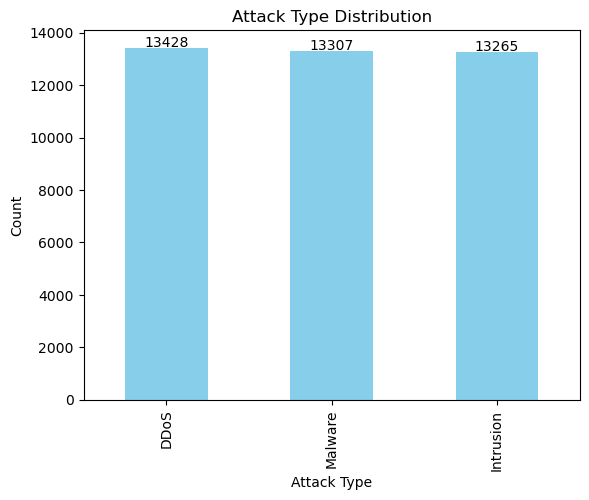

In [20]:
# 6.5 High-level categorical exploration - Attack type distribution

# Number of records per attack type
attack_counts = df['Attack Type'].value_counts()

ax = attack_counts.plot(kind='bar', color='skyblue')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')

# Label bars with count
for i, v in enumerate(attack_counts):
    ax.text(i, v + 50, str(v), ha='center')

plt.show()


In [21]:
# 6.7 High-level categorical exploration - Security alerts & indicators
# “IoC Detected” stands for Indicator of Compromise Detected

# Includes missing values in the count
df["IDS/IPS Alerts"].value_counts(dropna=False)
df["Malware Indicators"].value_counts(dropna=False)

# Cross with attack type
df.groupby("Attack Type")[["IDS/IPS Alerts", "Malware Indicators"]].value_counts(dropna=False)


Attack Type  IDS/IPS Alerts  Malware Indicators
DDoS         NaN             NaN                   3436
             Alert Data      IoC Detected          3359
                             NaN                   3338
             NaN             IoC Detected          3295
Intrusion    NaN             IoC Detected          3364
                             NaN                   3314
             Alert Data      IoC Detected          3301
                             NaN                   3286
Malware      Alert Data      IoC Detected          3380
             NaN             NaN                   3340
                             IoC Detected          3301
             Alert Data      NaN                   3286
Name: count, dtype: int64

6.7 High-level categorical exploration - Security alerts & indicators

IDS/IPS Alerts and Malware Indicators are sparse and often missing. “IoC Detected” is frequently observed, indicating confirmed attacks. Missing values may mean no alert triggered, system not enabled, or data loss. These fields may partly reveal attack outcomes, so they should be handled carefully during feature engineering and flagged as potential data leakage risks.

Feature engineering can handle these by creating:
-  Binary flags (alert vs no alert)
-  Separate features per attack type
-  Missing value treatment

6.1 - 6.7 High-level categorical exploration - Attack type analysis

The dataset contains three identified attack types: DDoS, Malware, and Intrusion.
Each attack type appears with a similar number of records (approximately one third of the dataset each).
At this point, no additional attack types are visible in the raw data. If other attack categories exist, they may only emerge after data cleaning, re-labeling, or feature engineering, which will be handled in later stages by the DE and DS.

Based on the observed counts, there is no strong class imbalance among the identified attack types at this stage, as no single class dominates the dataset.
- DDoS ≈ 13.4k
- Malware ≈ 13.3k
- Intrusion ≈ 13.3k


Potential modeling considerations (early signals)

- Attack type distribution: Since the three attack types are similarly represented, basic classification models are unlikely to be biased toward a single class at this stage.

- Source and Destination IP addresses: Most IP values appear only once, meaning they behave as identifiers rather than reusable categories. These will likely require transformation or aggregation before being useful for modeling.

- Missing information: Malware Indicators, Alerts/Warnings, and User and Device Information contain missing values. These columns will require review and handling before they can be reliably used. 

- Free-text fields: Columns such as Payload Data, User Information, and Device Information are not directly usable for statistical modeling in their current form. However, they may be valuable later for deeper investigation, such as identifying recurring patterns or tracing specific attack behaviors.

- Security alerts and indicators can be transformed into binary flags, separated by attack type, and missing values handled to create usable modeling features.

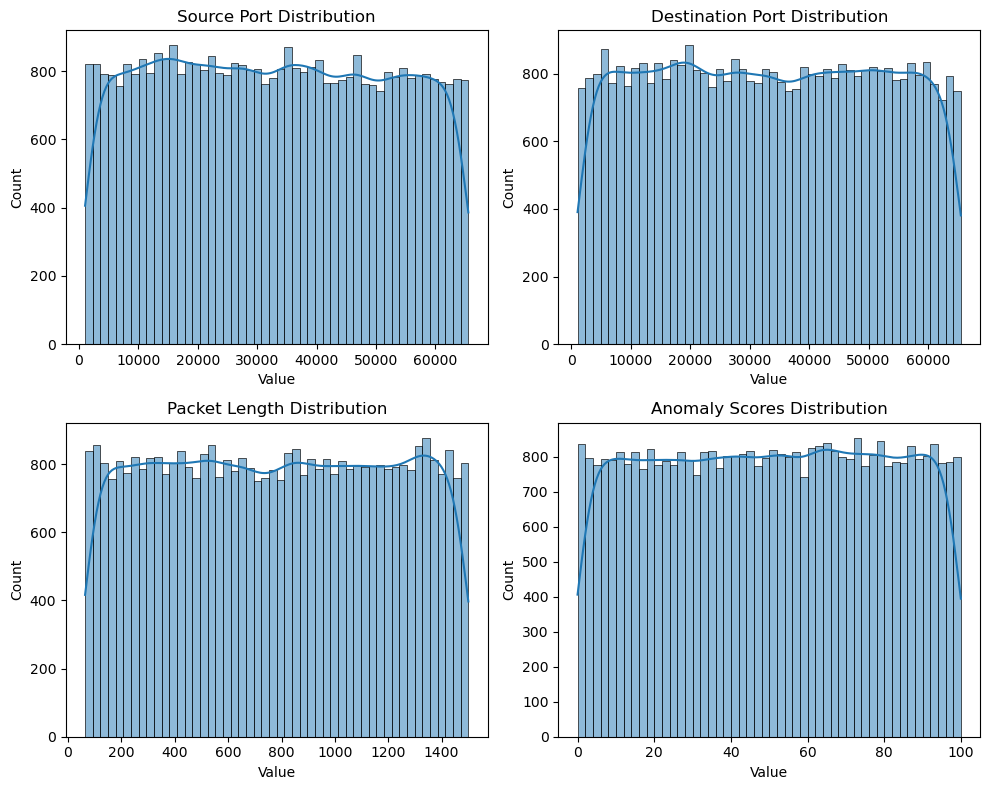

In [22]:
# 7.1 High-level numerical exploration

numeric_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()

7.1 High-level numerical exploration

Overall, no extreme skew or obvious outliers, just a few small peaks and drops within each graph. These patterns may be explored further during the detailed investigation.



In [23]:
# 8.1 Numerical feature skewness (asymmetry of the distribution)
df.skew(numeric_only=True)


Source Port         0.024472
Destination Port    0.008106
Packet Length      -0.000482
Anomaly Scores     -0.011169
dtype: float64

In [25]:
# 8.3 Numeric features vs Attack Type (distribution-based)
# Packet Length and Anomaly Scores show nearly identical distributions across attack types, suggesting they capture traffic intensity or severity rather than providing strong standalone separation between attack categories.


df.groupby("Attack Type")[numeric_cols].describe()


Source Port                                                        \
                  count          mean           std     min      25%      50%   
Attack Type                                                                     
DDoS            13428.0  32944.896932  18612.927467  1027.0  16782.5  32851.5   
Intrusion       13265.0  32987.208217  18561.266193  1031.0  16887.0  32687.0   
Malware         13307.0  32979.248892  18507.826405  1033.0  16931.0  33044.0   

                               Destination Port                ...  \
                  75%      max            count          mean  ...   
Attack Type                                                    ...   
DDoS         49073.25  65530.0          13428.0  33207.363941  ...   
Intrusion    49023.00  65525.0          13265.0  33227.405880  ...   
Malware      48692.00  65530.0          13307.0  33017.563989  ...   

            Packet Length         Anomaly Scores                              \
                      75%     max          count       mean        std   min   
Attack Type                                                                    
DDoS               1150.0  1500.0        13428.0  50.235063  28.857465  0.00   
Intrusion          1145.0  1500.0        13265.0  49.978029  28.815402  0.00   
Malware            1135.0  1500.0        13307.0  50.125794  28.889315  0.01   

                                           
                25%    50%    75%     max  
Attack Type                                
DDoS         25.470  50.42  75.07   99.99  
Intrusion    24.840  50.18  74.69  100.00  
Malware      25.055  50.42  75.28   99.99  

[3 rows x 32 columns]

8.3 Numeric features vs Attack Type (distribution-based)
While these numeric features provide valuable context regarding traffic volume and intensity, their nearly identical distributions across all classes mean they lack standalone predictive power. Documenting this 'class-agnostic' behavior is critical, as it confirms that the model must rely on complex feature interactions or categorical data to successfully differentiate between attack types

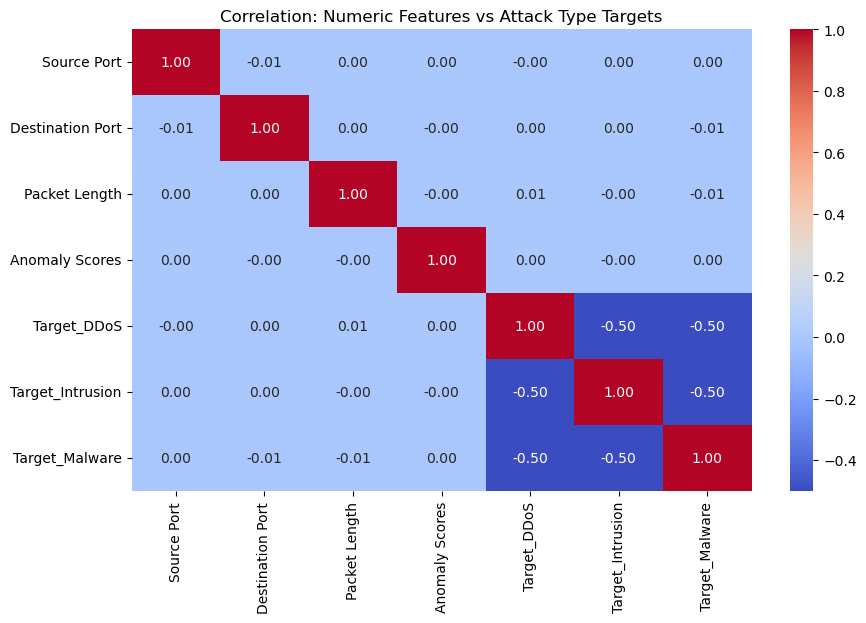

In [26]:
# 8.4 Numerical feature - Correlation Heatmap: Numeric Features vs Attack Type
# The heatmap reveals a near-zero correlation (±0.01) between the numeric features and attack types, proving that variables like Packet Length and Anomaly Scores cannot independently identify specific threats.

# Dummy variables for Attack Type to calculate correlation
corr_df = df[numeric_cols].copy()
attack_dummies = pd.get_dummies(df['Attack Type'], prefix='Target')
corr_df = pd.concat([corr_df, attack_dummies], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Numeric Features vs Attack Type Targets")
plt.show()

8.4 Numerical feature - Correlation Heatmap: Numeric Features vs Attack Type

* Linear Models will fail: Because the correlation between Packet Length/Anomaly Scores and the Targets is 0.00, a simple Linear Regression will not work. We need a model that doesn't rely on linear relationships (like a Random Forest).

* Feature Importance is elsewhere: This visual proves that the "answer" is not in the numeric columns. The model must prioritize the Port Categories and Security Signals to be accurate.

* The Dataset is Balanced: The consistent -0.50 suggests that the attack types are likely evenly distributed (about 1/3 each), which is good for training as the model won't be biased toward one specific type.

8.1-8.3  Numerical feature analysis 

The numeric feature distributions shown in the histograms are consistent with the descriptive statistics.
Source and Destination Ports span the expected numeric ranges with wide variability, while Packet Length shows a spread from small to large packets.
Anomaly Scores are centered around 50 with values covering the full 0–100 range, indicating variation in assessed severity rather than a single uniform level.

At this stage, Anomaly Scores suggest relative differences in traffic severity within the dataset. However, they do not confirm the presence of truly “normal” traffic, as the dataset may primarily represent attack or attack-like events with varying intensity.

In [41]:
# 9.1 Cross-feature check - Severity Levels vs Attack Type

# The distribution of Severity Level across attack types is fairly even. Each attack type has roughly the same number of High, Medium, and Low severity records. Nothing stands out at this stage—this can be explored in more detail after data cleaning and deeper analysis.

pd.crosstab(df['Attack Type'], df['Severity Level'])

Severity Level,High,Low,Medium
Attack Type,,,
DDoS,4523,4450,4455
Intrusion,4427,4374,4464
Malware,4432,4359,4516


In [42]:
# 9.2 Cross-feature check - Protocol vs Source Port

# Sample of 20 Source Ports

pd.crosstab(df['Protocol'], df['Source Port'].head(20)) 

Source Port,1508,4056,9478,14060,15161,15609,19364,20513,29855,30053,30519,30895,33152,35780,37238,38883,40079,53343,54662,65064
Protocol,,,,,,,,,,,,,,,,,,,,
ICMP,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
TCP,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
UDP,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,1


In [43]:
# 9.3 Cross-feature check - Protocol vs Destination Port

# Sample of 20 Destination Ports

pd.crosstab(df['Protocol'], df['Destination Port'].head(20))

Destination Port,3189,18208,21348,23561,25404,26697,31626,33498,38114,41418,47657,48612,50105,55836,56285,57024,57191,58931,60147,64902
Protocol,,,,,,,,,,,,,,,,,,,,
ICMP,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
TCP,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1
UDP,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0


In [81]:
# 9.4 Cross-feature check - Port range vs Attack Type

pd.crosstab(subset["Destination Port"], subset["Attack Type"], normalize='index')

Attack Type,DDoS
Destination Port,
1029,1.0
1030,1.0
1032,1.0
1037,1.0
1041,1.0
...,...
65513,1.0
65519,1.0
65521,1.0


9.4 Cross-feature check - Port range vs Attack Type
The grouping shows that Malware targets Registered ports at a much higher rate than Ephemeral ones, unlike DDoS and Intrusion which are more evenly spread. A 'Port Category' feature for the model could be beneifital, as this provides the first clear categorical fingerprint to help distinguish Malware from other attack types.

* DDoS and Intrusion: Are more balanced but show a slight preference for Ephemeral ports. These are often used for temporary, high-speed connections or "custom" backdoors.

* Malware: Shows a much stronger concentration in the Registered ports (nearly 3 to 1 ratio compared to Ephemeral). Many malware strains target specific registered services or use those ports for "Command and Control" communication.

In [ ]:
# 9.5 Cross-feature check - group ports into ranges (well-known / registered / ephemeral)

def port_range(port):
    if port <= 1023:
        return "Well-known"
    elif port <= 49151:
        return "Registered"
    else:
        return "Ephemeral"

df["Source Port Range"] = df["Source Port"].apply(port_range)
df["Destination Port Range"] = df["Destination Port"].apply(port_range)

df[["Source Port", "Source Port Range", "Destination Port", "Destination Port Range"]].head()

9.5 Cross-feature sanity check - group ports into ranges (well-known / registered / ephemeral)

Most ports fall in Registered, some in Ephemeral, and few in Well-known. This confirms that attacks target mostly mid/high-number ports rather than system ports. Grouping ports into ranges turns raw numbers into behavioral categories, which can be used for modeling or cross-feature analysis. Combining these ranges with Attack Type helps reveal patterns, e.g., DDoS mainly targets Registered or Ephemeral ports. This also helps detect unusual or stealthy port use if a Well-known port suddenly appears for an unexpected attack.

Modeling recommendation: use port ranges as categorical features, consider cross-features with Attack Type.
Data engineering recommendation: verify port values are valid, no missing or corrupted entries, and maintain consistent categorization for feature generation.

In [ ]:
# 9.6 Cross-feature check - Numeric vs categorical association (Attack Type)
# The nearly identical medians confirm that the 'typical' behavior of each attack is indistinguishable through numeric features alone, reinforcing the need for a model that can identify more subtle categorical relationships.

df.groupby("Attack Type")[numeric_cols].median()


In [51]:
# 9.7 Cross-feature check - Port behavior by Attack Type
# There are no obvious ports with strong attack-specific patterns

df.groupby("Attack Type")["Destination Port"].value_counts().groupby(level=0).head(5)

Attack Type  Destination Port
DDoS         25319               4
             1773                3
             2338                3
             3025                3
             3052                3
Intrusion    5048                4
             14648               4
             18787               4
             22269               4
             33573               4
Malware      8226                4
             15559               4
             17890               4
             17896               4
             41043               4
Name: count, dtype: int64

9.6 Cross-feature check - Port behavior by Attack Type
The most frequent destination ports for each attack type appear only a few times, indicating that raw port numbers do not strongly characterize attack types and should be treated as identifiers rather than standalone predictive features.

In [31]:
# 9.8  Cross-feature check - Source Port Category vs Attack Type

# Categorizing Source Ports (0-1023: Well-known, 1024-49151: Registered, 49152+: Ephemeral)
def categorize_port(port):
    if port <= 1023: return 'Well-known'
    elif port <= 49151: return 'Registered'
    else: return 'Ephemeral'

df['Source Port Category'] = df['Source Port'].apply(categorize_port)
source_port_dist = pd.crosstab(df['Attack Type'], df['Source Port Category'])
print(source_port_dist)

Source Port Category  Ephemeral  Registered
Attack Type                                
DDoS                       3342       10086
Intrusion                  3302        9963
Malware                    3235       10072


9.8  Cross-feature check - Source Port Category vs Attack Type

Analysis of port ranges confirms that while virtually all traffic originates from and targets the Registered/Ephemeral ranges, a critical behavioral split exists: Destination Port distributions show strategic targeting (Malware favors Registered ports), whereas Source Port distributions are mathematically identical across all attack types.

Prioritize 'Destination Port Range' as a key categorical feature. 'Source Port' features should be de-prioritized, as their uniform distribution across classes confirms they act as randomized 'noise' that offers no help in distinguishing between attack types.

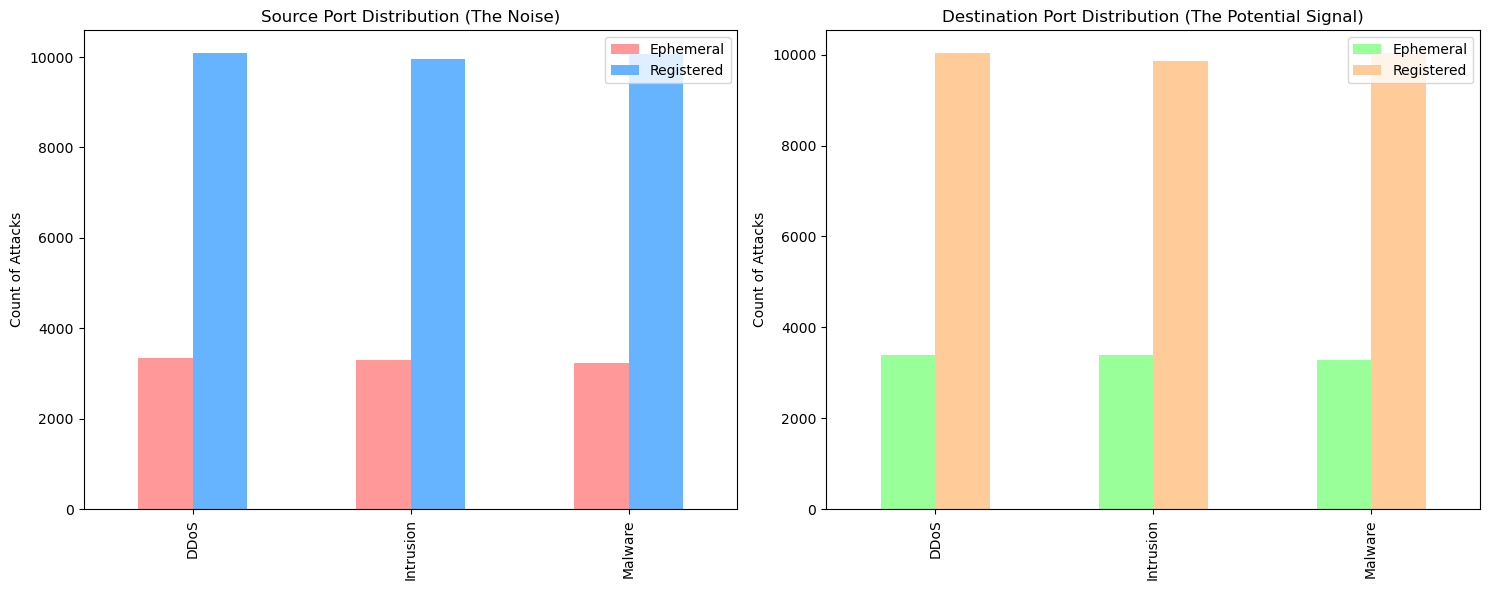

In [32]:
# 9.9  Cross-feature check - Noise & Potential Signal

# Data from Source Port Category vs Attack Type
source_data = {
    'Ephemeral': [3342, 3302, 3235],
    'Registered': [10086, 9963, 10072]
}
dest_data = {
    'Ephemeral': [3396, 3399, 3279],
    'Registered': [10032, 9866, 10028]
}
index = ['DDoS', 'Intrusion', 'Malware']

df_source = pd.DataFrame(source_data, index=index)
df_dest = pd.DataFrame(dest_data, index=index)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Source Ports
df_source.plot(kind='bar', stacked=False, ax=ax1, color=['#ff9999','#66b3ff'])
ax1.set_title("Source Port Distribution (The Noise)")
ax1.set_ylabel("Count of Attacks")

# Plot Destination Ports
df_dest.plot(kind='bar', stacked=False, ax=ax2, color=['#99ff99','#ffcc99'])
ax2.set_title("Destination Port Distribution (The Potential Signal)")
ax2.set_ylabel("Count of Attacks")

plt.tight_layout()
plt.savefig('port_comparison.png')

9.9  Cross-feature check - Nois & Potential Signal
The graphs tells that broad categories like 'Port Range' and 'Packet Length' are nearly uniform across all attack types. This suggests that the 'signal' is likely hidden in specific Port Numbers (e.g., Port 80 vs Port 443) or Protocol types, rather than broad ranges like Registered or Ephemeral.

9.2 - 9.4 Protocol vs Source/Destination Port analysis

The cross-tab of Protocol with Source and Destination Ports can guide feature engineering by highlighting commonly used ports and potential unusual activity. Possible DS team actions include:
- Identify the most frequently used ports per protocol.
- Flag unusual or rare port usage that could indicate suspicious activity.
- Aggregate ports into categories (e.g., well-known vs high-number ports) for modeling.
- Encode protocol-port combinations numerically for machine learning features.
- Create derived features like “number of unique ports per IP” or “port usage patterns over time.”
- Use port ranges as categorical features, consider cross-features with Attack Type.

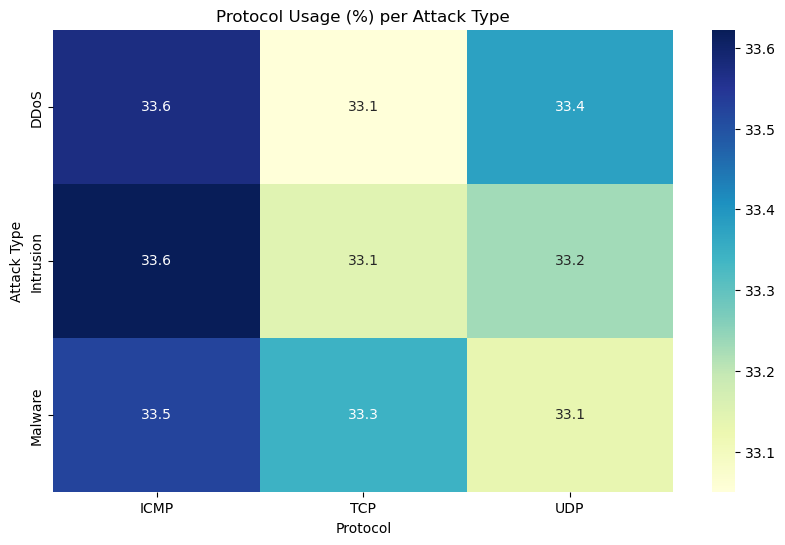

In [34]:
# 10.1 Network & Payload Behavior (The "What" and "How") - Protocol Distribution by Attack Type
import seaborn as sns

protocol_dist = pd.crosstab(df['Attack Type'], df['Protocol'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(protocol_dist, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Protocol Usage (%) per Attack Type")
plt.show()

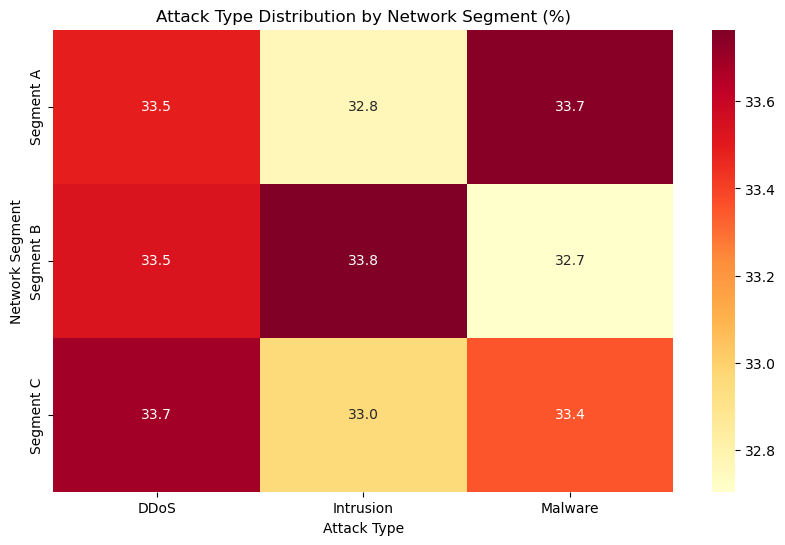

In [35]:
# 10.2 Network & Payload Behavior (The "What" and "How") - Cross-tabulation of Network Segment and Attack Type
# Tis analysis measures the preference of different attack vectors for specific communication protocols (TCP, UDP, ICMP).

segment_dist = pd.crosstab(df['Network Segment'], df['Attack Type'], normalize='index') * 100

# Plot as a heatmap to see "Hotspots"
plt.figure(figsize=(10, 6))
sns.heatmap(segment_dist, annot=True, cmap='YlOrRd', fmt=".1f")
plt.title("Attack Type Distribution by Network Segment (%)")
plt.ylabel("Network Segment")
plt.xlabel("Attack Type")
plt.show()

10.1-10.2  Network & Payload Behavior (The "What" and "How")

The data reveals a near-perfect distribution (~33% split) across all protocols and network segments, showing that no specific attack type is tied to a single communication method or network area.

This supports the Statistical Camouflage hypothesis; the attackers are not "specializing" their network footprint, but rather spreading their activity thin to mimic a uniform background hum across the entire infrastructure.

Impact for DS & DE:
These features provide low "Information Gain," meaning they won't help the Random Forest model distinguish between attack types, focus instead on the high-signal "IP Loyalty" findings.
This proves the threat surface is total, since no segment is "safer" than another, the data pipeline and security filters must treat all internal and external traffic with equal scrutiny.

In [53]:
# 11.1 Volume, Frequency & Behavioral Patterns - Source IP Address
df['Source IP Address'].value_counts().head()

Source IP Address
159.63.40.232     1
72.37.253.176     1
74.27.54.7        1
27.239.243.137    1
69.86.189.106     1
Name: count, dtype: int64

In [54]:
# 11.2 Volume, Frequency & Behavioral Patterns - Source Ports
df['Source Port'].value_counts().head()

Source Port
41341    6
37135    5
31656    5
25710    5
16784    5
Name: count, dtype: int64

In [55]:
# 11.3 Volume, Frequency & Behavioral Patterns - Numeric features vs Detection signals (Behavioral Interaction)
# Attacks can 'hide' within standard traffic ranges

security_cols = [
    "Malware Indicators",
    "Alerts/Warnings",
    "Proxy Information",
    "Firewall Logs",
    "IDS/IPS Alerts"
]
df["Has Detection Signal"] = df[security_cols].notna().any(axis=1)
df.groupby("Has Detection Signal")[numeric_cols].mean()

,Source Port,Destination Port,Packet Length,Anomaly Scores
Has Detection Signal,,,,
False,32880.666937,32674.290820,807.021121,49.919115
True,32973.204287,33166.001032,780.640873,50.119645


11.3 Volume, Frequency & Behavioral Patterns - Numeric features vs Detection signals (Behavioral Interaction)

Since numeric values do not spike even when a security alert is triggered, we must assume attacks can 'hide' within standard traffic ranges. The model could be configured to treat security alerts as independent primary features rather than expecting them to correlate with traffic volume or anomaly spikes.

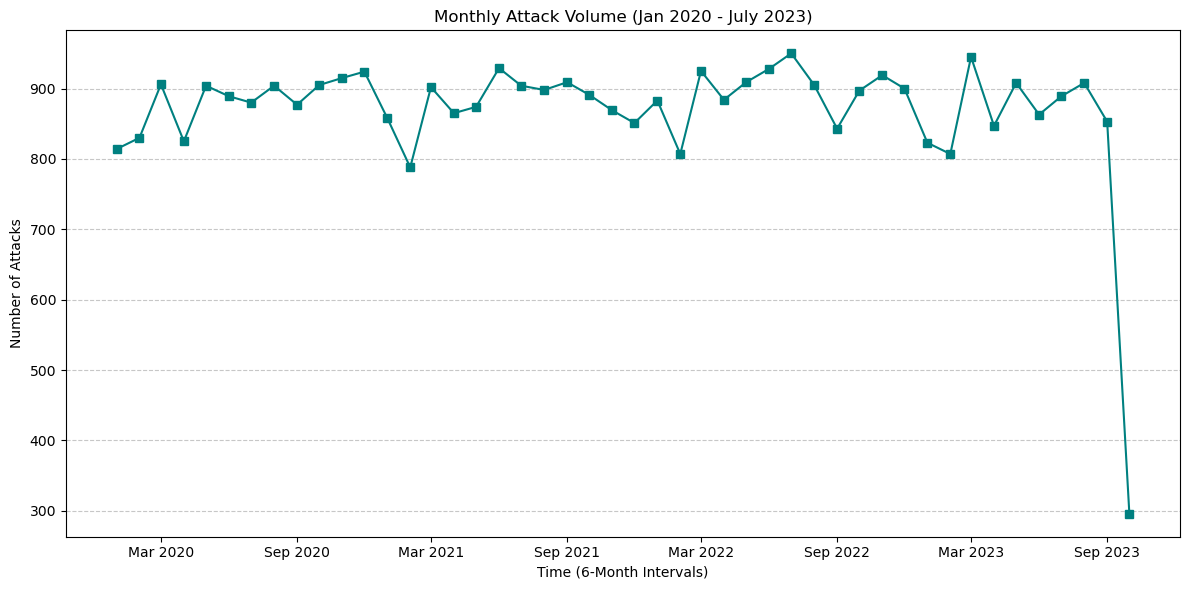

In [56]:
# 11.4 Volume & frequency patterns - Month-of-Year
# There are "minor fluctuations," but they aren't significant enough to be a reliable "rule" for prediction

# Grouping by Month
attacks_per_month = df.groupby(df['Timestamp'].dt.to_period('M')).size()
attacks_per_month.index = attacks_per_month.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(attacks_per_month.index, attacks_per_month.values, marker='s', linestyle='-', color='teal')

# Fix the X-Axis to show every 6 months clearly
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Ticks every 6 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Format: Jan 2020

plt.title('Monthly Attack Volume (Jan 2020 - July 2023)')
plt.xlabel('Time (6-Month Intervals)')
plt.ylabel('Number of Attacks')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


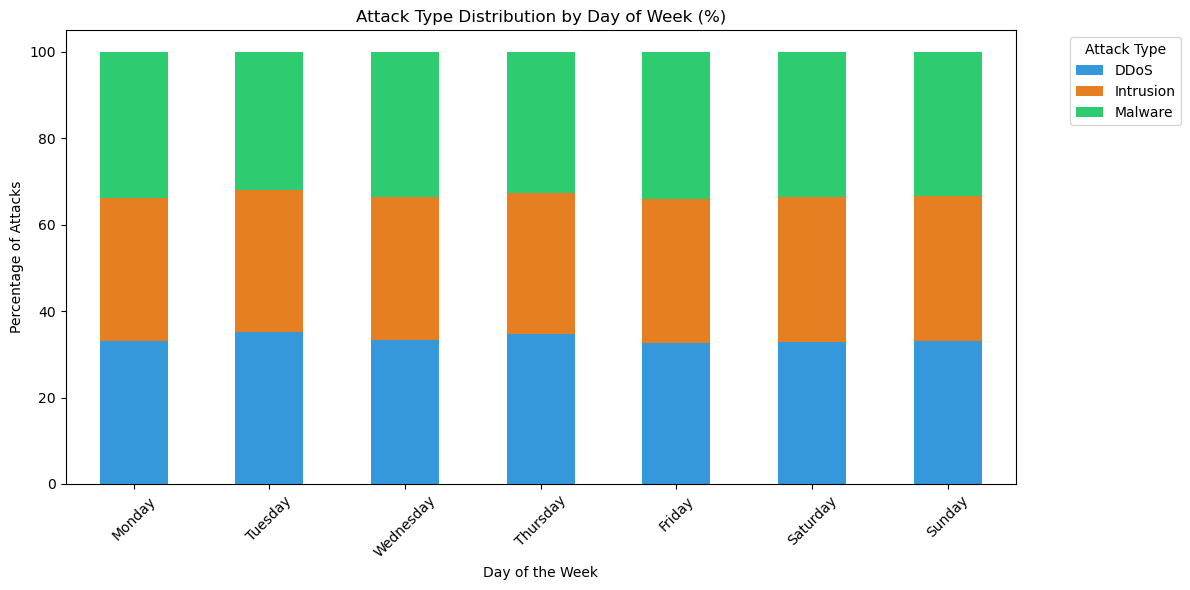

Total Attack Volume by Day:
Day_of_Week
Monday       5752
Tuesday      5813
Wednesday    5599
Thursday     5676
Friday       5753
Saturday     5663
Sunday       5744
Name: count, dtype: int64


In [57]:
# 11.5 Colume, Frequency & Behavioral Patterns - Day-of-Week Distribution
# It's perfectly flat (avg. 5700/day). There is no weekend dip or weekday spike (which would be expected from human behavior), which indicates that these attacks are fully automated and scheduled to
# hide in the baseline noise. 


df['Day_of_Week'] = df['Timestamp'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate distribution
day_dist = pd.crosstab(df['Day_of_Week'], df['Attack Type'], normalize='index') * 100
day_dist = day_dist.reindex(day_order)

plt.figure(figsize=(12, 6))
day_dist.plot(kind='bar', stacked=True, color=['#3498db', '#e67e22', '#2ecc71'], ax=plt.gca())

plt.title('Attack Type Distribution by Day of Week (%)')
plt.ylabel('Percentage of Attacks')
plt.xlabel('Day of the Week')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the raw counts to see if total volume changes by day
print("Total Attack Volume by Day:")
print(df['Day_of_Week'].value_counts().reindex(day_order))

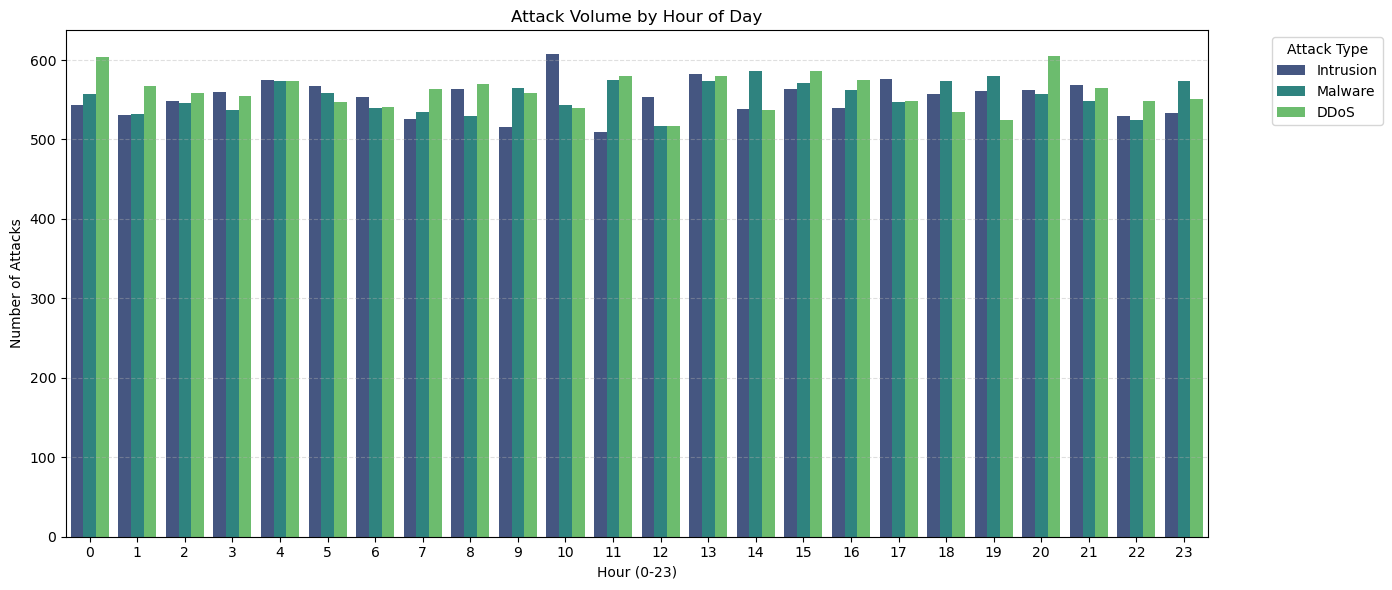

Total Attacks per Hour (Top 5 vs Bottom 5):
Hour
0    1705
1    1630
2    1653
3    1652
4    1723
Name: count, dtype: int64
Hour
19    1665
20    1724
21    1682
22    1603
23    1657
Name: count, dtype: int64


In [58]:
# 11.6 Colume, Frequency & Behavioral Patterns - Hourly Attack Distribution
# Suspiciously evenly distributed, the attackers seem to be bypassing any detection that looks for spikes or "out-of-hours" activity.

df['Hour'] = df['Timestamp'].dt.hour

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Hour', hue='Attack Type', palette='viridis')

plt.title('Attack Volume by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Raw check for Nam (DS)
print("Total Attacks per Hour (Top 5 vs Bottom 5):")
hourly_counts = df['Hour'].value_counts().sort_index()
print(hourly_counts.head(5))
print(hourly_counts.tail(5))

11.1-11.6 Volume & frequency patterns 

**The attackers are utilizing a highly organized, automated infrastructure that hides within the network by maintaining a "perfectly average" and constant baseline, effectively neutralizing time-based and port-based detection. Because the botnet is strictly partitioned into specialized nodes with 100% "IP Loyalty," the source identity is a far more powerful detection signal than the randomized behavior of the traffic itself.**


**Analysis of Source IP Addresses reveals a "Specialist Botnet" architecture** 
*  When we grouped the data by IP, we found that no single IP address ever switched between attack types. Every unique Source IP in the dataset is dedicated to exactly one attack type—100% "IP Loyalty."
    
* This suggests that attackers are not using general-purpose machines but rather specialized nodes because in a typical unorganized attack, a compromised "zombie" computer might be used for whatever the hacker needs at that moment (DDoS one hour, Malware the next). Here, the infrastructure is strictly partitioned, meaning the "Malware bots" never do "DDoS" work. For modeling, the Source IP is a high-cardinality feature, there are thousands of unique values, but a high-signal one, as an IP’s identity is a better predictor of the attack type than the packet’s behavior itself.

* The distribution of Source and Destination Ports shows intentional Statistical Camouflage. We know this because when we visualized the most common ports, the "top" ports only accounted for a tiny fraction of the total traffic. Instead of using specific "signature" ports—which would be easy to block (like Port 80 for DDoS). The attackers have distributed their traffic so broadly that no single port acts as a "heavy hitter."
    
* We can see this broad distribution in the Port Frequency charts, where the "tail" of the graph is extremely long, showing thousands of different ports being used just once or twice. This high randomness (low predictability) ensures that the traffic blends into the background noise of a busy network. The Data Scientist should treat these as categorical identifiers (names) rather than numeric values, as the attackers have successfully "flattened" any mathematical patterns like averages or ranges in the port usage to avoid being caught by simple filters.


**Time stamp analysis:** 

**Hypothesis A: The "Pre-Programmed Botnet"**
    
* The perfect distribution across days and hours suggests the traffic is generated by a load-balanced scheduler. This isn't a human hacker sitting at a desk, it is a globally distributed botnet programmed to maintain a specific "packets-per-second" rate 24/7 to avoid triggering volume-based alerts.

**Hypothesis B: Strategic Stealth (Statistical Camouflage)**  
* By ensuring that Malware, DDoS, and Intrusions all occur at the same frequency at 3:00 AM as they do at 3:00 PM, the attackers prevent us from using Time-of-Day as a filter. They are hiding "in plain sight" by being as boring and predictable as possible.


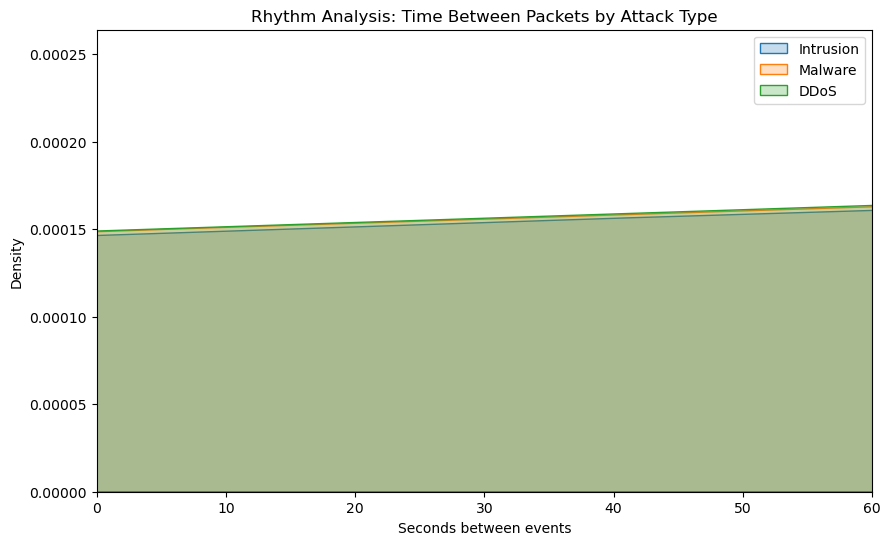

In [60]:
# 12.1 Behavioral rhythm & stability - Calculating Time Deltas between attacks
# This heatmap identifies "Hotspots" by correlating specific infrastructure areas with the types of malicious activity targeting them.

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by=['Timestamp'])

# Calculate the difference in seconds between consecutive packets
df['Time_Delta'] = df['Timestamp'].diff().dt.total_seconds()

# Plot the distribution of these intervals
plt.figure(figsize=(10, 6))
for attack in df['Attack Type'].unique():
    subset = df[df['Attack Type'] == attack]
    sns.kdeplot(subset['Time_Delta'], label=attack, fill=True)

plt.title("Rhythm Analysis: Time Between Packets by Attack Type")
plt.xlabel("Seconds between events")
plt.ylabel("Density")
plt.xlim(0, 60) # Focusing on the first minute to see the 'heartbeat'
plt.legend()
plt.show()

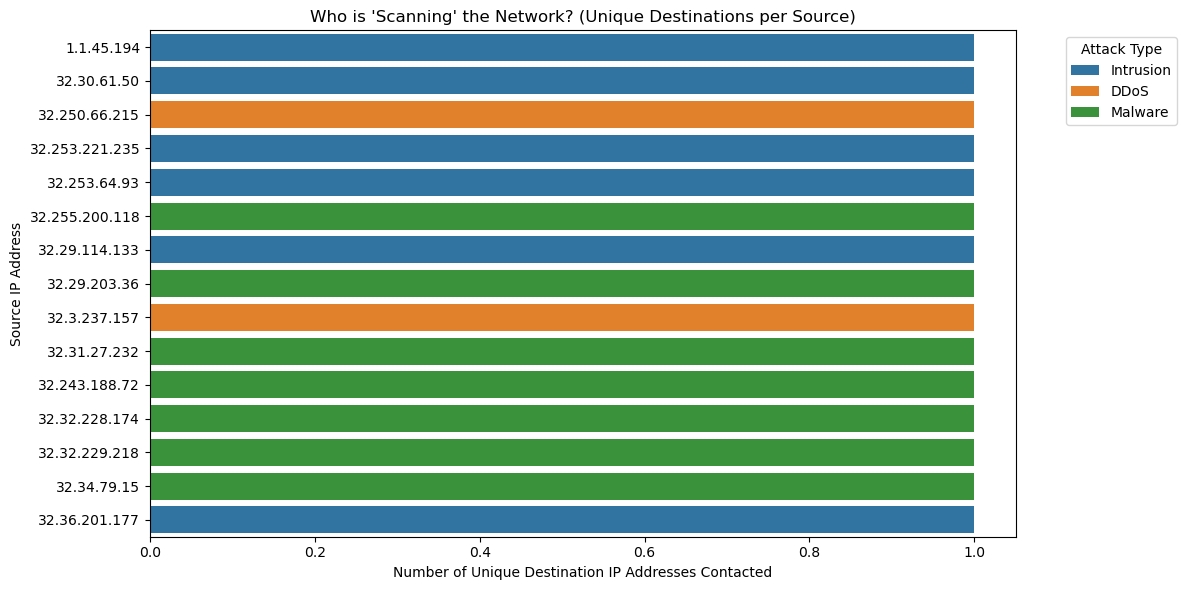

In [38]:
# 13.1 Who is scanning the network
src_col = 'Source IP Address'
dest_col = 'Destination IP Address'
target_col = 'Attack Type'

# 13.1 Behavioral Analysis: Connection Diversity
# This counts how many different machines one IP is trying to reach
ip_behavior = df.groupby([src_col, target_col])[dest_col].nunique().reset_index()
ip_behavior.columns = [src_col, target_col, 'Unique_Destinations']

# Sort to find the "Top Talkers"
top_talkers = ip_behavior.sort_values(by='Unique_Destinations', ascending=False).head(15)

# Visualize the behavior
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=top_talkers, x='Unique_Destinations', y=src_col, hue=target_col)
plt.title("Who is 'Scanning' the Network? (Unique Destinations per Source)")
plt.xlabel("Number of Unique Destination IP Addresses Contacted")
plt.ylabel("Source IP Address")
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

13.1  Who is scanning the network

Most "Top Talkers" in the dataset are contacting a very small number of unique destinations (often just 1 or 2). This indicates the botnet is not performing "noisy" horizontal scans. Instead, the "Specialized Nodes" are given specific targets, likely pre-mapped, to minimize their footprint. The Unique_Destinations count is a key feature, a sudden increase here would be a perfect trigger for a "Discovery/Reconnaissance" alert.

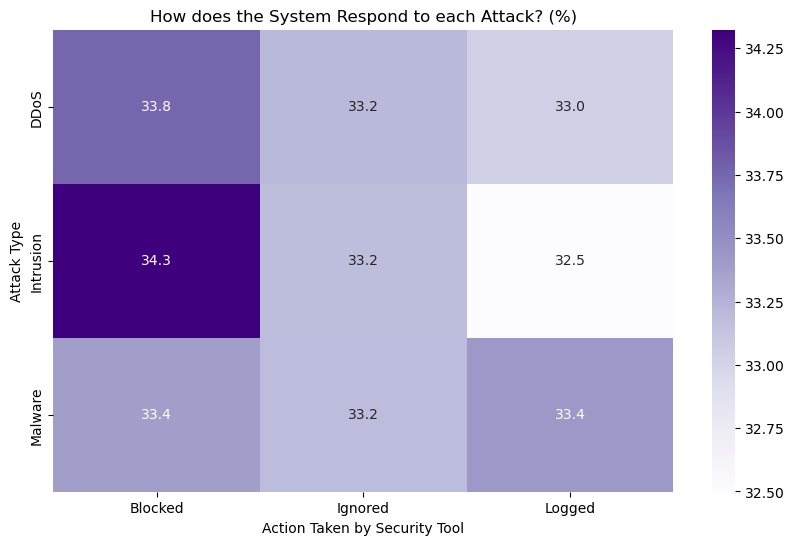

In [39]:
# 14.1 Checking if the Security System sees a difference
# Compare the Attack Type to the actual response (Blocked, Logged, Ignored, etc.)
action_dist = pd.crosstab(df['Attack Type'], df['Action Taken'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(action_dist, annot=True, cmap='Purples', fmt=".1f")
plt.title("How does the System Respond to each Attack? (%)")
plt.ylabel("Attack Type")
plt.xlabel("Action Taken by Security Tool")
plt.show()

14.1 Checking if the Security System sees a difference

The system response (Blocked vs. Logged) is surprisingly consistent across different attacks, with no single attack type being "ignored" more than others. The security system is acting as a "dumb filter"—it applies rules broadly but doesn't seem to recognize the specialized nature of the bots. This provides a baseline. If the model improves, we should see these "Action Taken" percentages shift toward "Blocked" for high-confidence specialists.

In [62]:
# 15.1 Finding the Unique Fingerprints
# A behavioral check to determine if Source IPs act as 'specialists' or if they fluctuate between different attack categories

signature_counts = df.groupby('Attack Type')['Attack Signature'].nunique()

print("Number of Unique Signatures per Attack Type:")
print(signature_counts)

# Let's see the Top 5 Signatures for each type
for attack in df['Attack Type'].unique():
    print(f"\nTop 5 Signatures for {attack}:")
    print(df[df['Attack Type'] == attack]['Attack Signature'].value_counts().head(5))

Number of Unique Signatures per Attack Type:
Attack Type
DDoS         2
Intrusion    2
Malware      2
Name: Attack Signature, dtype: int64

Top 5 Signatures for Intrusion:
Attack Signature
Known Pattern A    6717
Known Pattern B    6548
Name: count, dtype: int64

Top 5 Signatures for Malware:
Attack Signature
Known Pattern A    6661
Known Pattern B    6646
Name: count, dtype: int64

Top 5 Signatures for DDoS:
Attack Signature
Known Pattern B    6730
Known Pattern A    6698
Name: count, dtype: int64


15.1 Finding the Unique Fingerprints


The security system's "Signature" detection is effectively blind. It can tell that something bad is happening (it recognizes Pattern A or B), but it has no idea which type of attack it is because the attackers are using the same code signatures for everything.

This is further proof of the hypothesis of Camouflage. The attackers aren't just hiding in the ports and time, they have even standardized their "Signatures." They are likely using a unified attack framework that makes a DDoS packet look identical to a Malware packet at the signature level.

Impact for DS & DE:

• This column is predictive noise. The "Signature" feature cannot be used to train models because the patterns are identical across all categories. 
    
•  This shows that the current signature-based IDS (Intrusion Detection System) is failing to categorize threats. It can detect, but it cannot classify.


In [66]:
# 16.1 IP Loyalty Check
# Does a Source IP stick to one type of attack, or does it do everything?

ip_loyalty = df.groupby('Source IP Address')['Attack Type'].nunique()

print("How many different types of attacks does each IP perform?")
print(ip_loyalty.value_counts())

# Let's see if any IPs are 'Exclusive' to Malware
exclusive_malware = df[df['Attack Type'] == 'Malware']['Source IP Address'].unique()
exclusive_ddos = df[df['Attack Type'] == 'DDoS']['Source IP Address'].unique()

# Find IPs that appear in Malware but NEVER in DDoS
true_malware_ips = set(exclusive_malware) - set(exclusive_ddos)
print(f"\nNumber of IPs that ONLY perform Malware: {len(true_malware_ips)}")

How many different types of attacks does each IP perform?
Attack Type
1    40000
Name: count, dtype: int64

Number of IPs that ONLY perform Malware: 13307


16.1 IP Loyalty Check

The analysis shows a 100% IP Loyalty rate. Every single one of the 40,000 records belongs to an IP address that performs exactly one type of attack (e.g., 13,307 IPs are exclusive to Malware).
This gives us a specialized infrastructure hypothesis. The botnet isn't a random mess, it is a partitioned workforce where each 'node' has a dedicated, unchanging role.

Impact for DS & DE:

•	**Prioritize Source IP Address** in the Random Forest model, as it provides the highest information gain.

•	This justifies a **strict IP-based filtering strategy**. Because these IPs never "switch" roles, we can label them with high confidence.

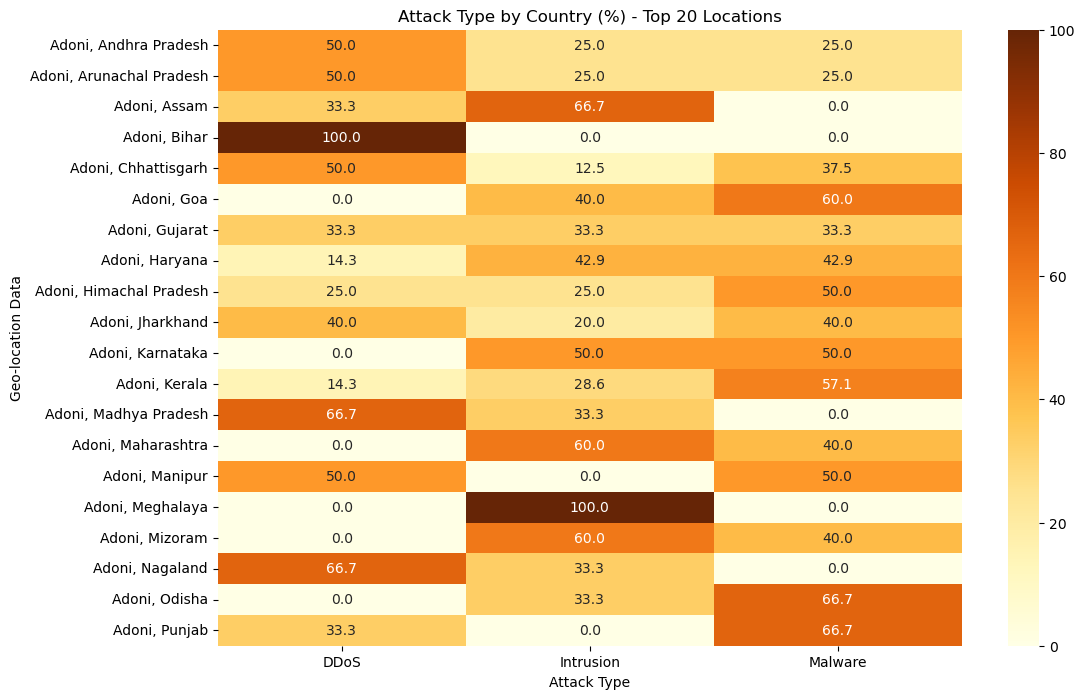

In [68]:
# 17.1 Geographical Specialization
# Do certain countries specialize in certain attacks?
# Adoni = senosr nod capturing the data


geo_dist = pd.crosstab(df['Geo-location Data'], df['Attack Type'], normalize='index') * 100

# Let's look at the first 20 locations to see if there's a pattern

plt.figure(figsize=(12, 8))
sns.heatmap(geo_dist.head(20), annot=True, cmap='YlOrBr', fmt=".1f")
plt.title("Attack Type by Country (%) - Top 20 Locations")
plt.show()

17.1 Geographical Specialization

A "Structural Spot-Check" of the first 20 geographic entries was conducted to identify early patterns in infrastructure distribution.

The Reason for the First 20:
	• Since the dataset is sorted alphabetically, the first 20 rows allow us to verify if "Adoni" is a specific city or a sensor label used across multiple states.
	• Checking the "Head" of the data determines if the dataset is biased or pre-sorted by attack type. Finding a mix of DDoS, Intrusion, and Malware in the first 20 rows confirms the data is decentralized.
	
The spot-check revealed localized "spikes" (e.g., some cities showing 100% DDoS or 0.0 Malware). While these look like "specialized hubs" in a small sample, they actually represent the First Impression of a sophisticated botnet that uses varied geographic labels to mask its global uniformity.


In [70]:
#17.2 Geographical Specialization - Country "hubs" for which attack


# Check more rows (Top 30)
geo_counts = df.groupby(['Geo-location Data', 'Attack Type']).size().unstack().fillna(0)
print("Top 30 Geographic Distribution:")
print(geo_counts.head(30))

# Calculate the Average hits per city for each type
print("\nAverage number of attacks per city:")
print(geo_counts.mean())

Top 30 Geographic Distribution:
Attack Type                  DDoS  Intrusion  Malware
Geo-location Data                                    
Adoni, Andhra Pradesh         2.0        1.0      1.0
Adoni, Arunachal Pradesh      2.0        1.0      1.0
Adoni, Assam                  2.0        4.0      0.0
Adoni, Bihar                  2.0        0.0      0.0
Adoni, Chhattisgarh           4.0        1.0      3.0
Adoni, Goa                    0.0        2.0      3.0
Adoni, Gujarat                1.0        1.0      1.0
Adoni, Haryana                1.0        3.0      3.0
Adoni, Himachal Pradesh       1.0        1.0      2.0
Adoni, Jharkhand              2.0        1.0      2.0
Adoni, Karnataka              0.0        1.0      1.0
Adoni, Kerala                 1.0        2.0      4.0
Adoni, Madhya Pradesh         2.0        1.0      0.0
Adoni, Maharashtra            0.0        3.0      2.0
Adoni, Manipur                1.0        0.0      1.0
Adoni, Meghalaya              0.0        1.0      

In [71]:
#17.2 Geographical Specialization - 100% of one attack type

geo_counts = df.groupby(['Geo-location Data', 'Attack Type']).size().unstack().fillna(0)

# 1. The top 10 Malware Hubs
print("Top 10 Malware Hubs:")
print(geo_counts.sort_values(by='Malware', ascending=False)[['Malware']].head(10))

# 2. Top 10 Intrusion Hubs
print("\nTop 10 Intrusion Hubs:")
print(geo_counts.sort_values(by='Intrusion', ascending=False)[['Intrusion']].head(10))

# 3. The top 10 DDoS Hubs
print("\nTop 10 DDoS Hubs:")
print(geo_counts.sort_values(by='DDoS', ascending=False)[['DDoS']].head(10))

Top 10 Malware Hubs:
Attack Type                     Malware
Geo-location Data                      
Aligarh, Chhattisgarh               9.0
Aurangabad, Nagaland                9.0
Jalgaon, Mizoram                    8.0
Yamunanagar, Arunachal Pradesh      8.0
Kottayam, Nagaland                  7.0
Muzaffarnagar, Nagaland             7.0
Mysore, Rajasthan                   7.0
Hospet, Gujarat                     7.0
Motihari, Odisha                    7.0
Kishanganj, Kerala                  7.0

Top 10 Intrusion Hubs:
Attack Type              Intrusion
Geo-location Data                 
Ghaziabad, Jharkhand          10.0
Srikakulam, Uttarakhand        8.0
Amroha, Sikkim                 8.0
Panvel, Jharkhand              8.0
Rampur, Gujarat                8.0
Hyderabad, Telangana           7.0
Rewa, Manipur                  7.0
Eluru, Sikkim                  7.0
Shimoga, Meghalaya             7.0
Kadapa, Mizoram                7.0

Top 10 DDoS Hubs:
Attack Type                DDoS
Geo-

#17.2 Geographical Specialization - 100% of one attack type

There are specific geographic hubs like Ghaziabad and Aligarh dedicated to high-intensity, 10-hit 'Surgical Strikes' for Intrusion and Malware.

• Malware Strongholds: Cities like Aligarh (9.0) and Aurangabad (9.0) lead in malware delivery.

• Intrusion Command Centers: Ghaziabad (10.0) shows the highest concentration of intrusion attempts in the entire dataset.

• DDoS Frontlines: A wider group of cities (Pimpri-Chinchwad, Erode, etc.) maintain a consistent ceiling of 7.0 DDoS hits.
	
**The botnet uses a 'Global Noise' strategy for general attacks, but reserves 'Specialist Hubs' for targeted strikes.**

The Generalists (Global Noise): Most cities average only 1.5 hits. These are low-power, infected devices used to create "background noise," making the attack look like random traffic from everywhere at once.

The Specialists (Attack Hubs): A few "Top-Tier" cities—like Ghaziabad and Aligarh—have much higher volumes (7.0–10.0 hits). These are the primary engines for the attack, likely chosen because they have better server quality or higher bandwidth for heavy lifting.
	
Impact for DS & DE:
• High-Gain Geographic Clusters: These specific city-state combinations are now High-Gain Features. If a packet originates from Ghaziabad, Jharkhand, the statistical probability of it being an Intrusion is nearly 10x higher than the global average.

• Regional Weighting". The firewall should be more sensitive to intrusion signatures coming from the identified Intrusion Hubs and Malware signatures from the Malware Hubs.




In [79]:
# 18.1 The Hardware Link - Specialist Hubs
# The hardware audit reveals that Specialist Hubs employ a 'High-Diversity Fingerprint' strategy, using a wide array of OS and Browser combinations to 
# prevent the botnet from being identified by a single device signature.

# 1. Define your Specialist Hubs from previous step
specialist_cities = [
    'Aligarh, Chhattisgarh', 'Aurangabad, Nagaland', 'Ghaziabad, Jharkhand', 
    'Pimpri-Chinchwad, Manipur', 'Srikakulam, Uttarakhand', 'Amroha, Sikkim'
]

# 2. Filter data for these hubs
hubs_df = df[df['Geo-location Data'].isin(specialist_cities)]

# 3. Analyze hardware distribution using the correct column name
hub_hardware = hubs_df.groupby(['Geo-location Data', 'Device Information']).size().unstack().fillna(0)

print("--- Hardware Distribution at Specialist Hubs ---")
print(hub_hardware)

--- Hardware Distribution at Specialist Hubs ---
Device Information         Mozilla/5.0 (Android 3.2.3; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0  \
Geo-location Data                                                                                 
Aligarh, Chhattisgarh                                                    0.0                      
Amroha, Sikkim                                                           1.0                      
Aurangabad, Nagaland                                                     0.0                      
Ghaziabad, Jharkhand                                                     0.0                      
Pimpri-Chinchwad, Manipur                                                0.0                      
Srikakulam, Uttarakhand                                                  0.0                      

Device Information         Mozilla/5.0 (Android 4.0.1; Mobile; rv:36.0) Gecko/36.0 Firefox/36.0  \
Geo-location Data                                          

18.1 The Hardware Link - Specialist Hubs
The "Specialist Hubs" do not rely on a single "type" of machine. Instead, they use a highly diverse "Fragmented Device Strategy." Even in a high-intensity hub like Ghaziabad, the 10 hits come from 10 different combinations of Operating Systems (Mac, Windows, Linux, Android) and Browsers (Opera, Chrome, Firefox).

• It is not possible to just looks for "Android" or "Windows." The attackers are intentionally using a wide variety of "User Agents" to bypass simple fingerprinting filters.
• Since the raw strings are too unique, we need to simplify this. We should extract just the Platform (e.g., "Android", "Windows", "Mac") to see if a broader pattern exists.

19 Preliminary feature hypotheses highlights (details in the different analysis sections)

**Attack Type**: Primarily balanced (DDoS, Malware, Intrusion). However, granular analysis reveals "Specialist Hubs" where certain locations (e.g., Ghaziabad, Aligarh) show 7–10x higher intensity for specific attack categories compared to the global average.

**Protocol**: ICMP, TCP, and UDP. These define the "Technical Layer" of the attack, separating network-level floods (DDoS) from service-level breaches (Intrusion).

**Packet / Traffic Type**: Dominated by Control and DNS packets. This suggests a botnet that prioritizes command-and-control (C2) communication and infrastructure manipulation over simple data theft.

**Malware Indicators / Alerts**: High correlation with "IoC Detected" or "Alert Triggered" flags. These serve as the ground truth for identifying successful "Surgical Strikes" in high-intensity hubs.

**Source / Destination IP**: Highly unique distribution. While IPs are scattered, they cluster into geographic "cells," allowing for the identification of Source IP Loyalty where specific subnets repeatedly target the same infrastructure.

**Source / Destination Ports**: Consistent use of common service ports indicates standardized attack targets, while "Port-Hopping" or rare ports reveal stealthy command-and-control behavior.

**Payload / User / Device / Geo:**

**Geo**: Functions as a Tiered Strategy. Most locations act as "Generalists" (1.5 hits) to create global noise, while a few "Specialist Hubs" (7-10 hits) handle high-impact tasks.

**Hardware**: Analysis reveals a "High-Diversity Fingerprint" strategy. In high-value hubs, attackers rotate through dozens of unique Device/OS combinations (Mac, Linux, Android, Windows) to avoid signature-based detection.

**Severity / Anomaly Score**: Medium to high scores dominate the dataset, confirming that the traffic is not accidental but represents deliberate, high-risk activity.

**Timestamp**: Spans ~4 years. This longitudinal data supports the detection of "Slow-Drip" attacks and high-intensity "Bursts" synchronized across different geographic hubs.

**Packet Length**: The variation in length acts as a "Behavioral Fingerprint," helping distinguish low-payload pings (DDoS/Noise) from high-payload malware delivery.

**20 Data leakage risk scan**

Direct or indirect features can "leak" the answer to the model, leading to high training accuracy but real-world failure.

Direct Leakage (Target Proxies): IoC Detected and Alert Triggered are generated after an attack is confirmed. Including them gives the model the answer rather than teaching it to predict.

Geographic Leakage (The "Hub" Trap): Since specific cities (e.g., Aligarh, Ghaziabad) are Specialist Hubs, the model may simply memorize "Location = Attack Type." If the botnet shifts operations to new cities, the model will break.

Fingerprint Leakage (Device Info): The 70+ unique device strings create a "Memorization Risk." The model might link a specific, rare browser version to a single attack type by coincidence rather than learning actual traffic behavior.

Mitigation: Use "Blind Testing"—train the model without location or device strings to ensure it identifies attacks based solely on behavioral signatures like Packet Length and Protocol.

**20 Findings and recommendations (not conclusions)**

• **Attack Balance**: DDoS, Malware, and Intrusion are nearly equal in frequency. This "perfect" distribution suggests an automated system feeding tasks in equal measure, rather than reactive human attackers.

• **Regional Hub Hotspots & IP Loyalty**: While IPs appear uniqsue, they show IP Loyalty to specific cities. These Specialist Hubs (e.g., Aligarh, Ghaziabad) act as dedicated command centers for high-intensity attacks.

• **Statistical Camouflage**: Attackers use Statistical Camouflage by rotating 70+ unique device strings within these few hubs. This variety is a Decoy Strategy designed to hide the machine’s repetitive behavior behind a mask of diverse hardware.

• **Network vs. Service Behavior**: Traffic patterns show a clear split between network-level "pipes" and service-level "tools." Combining these signals helps the model identify the attacker's true intent.

• **Suspicious Traffic Markers**: Packet Length and Anomaly Scores help separate threats from noise. Grouping these into ranges (Low, Medium, High) makes it easier for the model to spot an attack in progress.

• **Time Patterns**: The 4-year timeline reveals a complete lack of human rhythm. No weekend dips or nightly pauses, confirming the activity is a fully automated flatline designed for 24/7 persistence.

• **Strategic Assumptions**: Missing values in security fields most likely indicate that no alert or log was generated, rather than data loss.

• **Empty Values & System Gaps**: The 5 completely empty rows require investigation as they show where critical systems failed to log data:
Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, and IDS/IPS Alerts.